In [1]:
import pandas as pd
import numpy as np

## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).


In [2]:
!curl https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv > housing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1390k  100 1390k    0     0  6263k      0 --:--:-- --:--:-- --:--:-- 6435k


### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [3]:
housing_df = pd.read_csv("housing.csv")

In [4]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


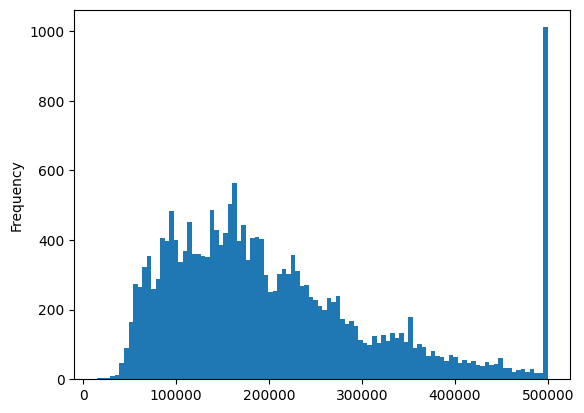

In [5]:
housing_df.median_house_value.plot.hist(bins=100);

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


In [6]:
housing_df = housing_df[(housing_df.ocean_proximity == "<1H OCEAN") | (housing_df.ocean_proximity == "INLAND")]

In [7]:
cols_to_keep = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']
housing_df = housing_df[cols_to_keep].reset_index(drop=True)

In [8]:
housing_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [9]:
nan_cols = housing_df.isna().any()
list(nan_cols[nan_cols].index)

['total_bedrooms']

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [10]:
housing_df.population.median()

1195.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [11]:
housing_df["log_median_house_value"] = np.log1p(housing_df["median_house_value"])

In [12]:
housing_df = housing_df.drop(["median_house_value"], axis=1)

In [13]:
train = housing_df.sample(frac=0.6,random_state=42)
rest = housing_df.drop(train.index)
val = rest.sample(frac=0.5, random_state=42)
test = rest.drop(val.index)

In [14]:
train.shape, val.shape, test.shape

((9412, 9), (3138, 9), (3137, 9))

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


In [26]:
def get_nan_columns(df):
    nan_cols = housing_df.isna().any()
    return list(nan_cols[nan_cols].index)

def get_nan_means(df, nan_cols, fill_with_zeros):
    nan_means = {}
    for col in nan_cols:
        if fill_with_zeros:
            nan_means[col] = 0
        else:
            nan_means[col] = df[col][~df[col].isna()].mean()
    return nan_means

def fill_nan_column(df, nan_column, fill_value):
    df[nan_column].fillna(value=fill_value, inplace = True)

def clean_training_data(df, fill_with_zeros):
    nan_cols = get_nan_columns(df)
    nan_means = get_nan_means(df, nan_cols, fill_with_zeros)
    print(nan_means)
    return df.fillna(value=nan_means)
    return df

def clean_test_data(df):
    df.dropna(axis=0, inplace=True)
    

In [27]:
train_with_imputed_mean = clean_training_data(train, False)
train_with_imputed_zeros = clean_training_data(train, True)
clean_test_data(val)
clean_test_data(test)

{'total_bedrooms': 542.563854904486}
{'total_bedrooms': 0}


In [28]:
train_with_imputed_mean.isnull().sum().sum(), train_with_imputed_zeros.isnull().sum().sum(), val.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0, 0, 0)

In [35]:
def get_feature_matrix(df, target_variable):
    X = np.array(df.drop([target_variable], axis=1))
    bias_feature = np.ones(X.shape[0])
    X = np.column_stack([bias_feature, X])
    return X

def get_target(df, target_variable):
    return np.array(df[target_variable])
    
def get_linear_regression_coeffs(X, y):
    XTX = np.matmul(X.T, X)
    return np.matmul(np.matmul(np.linalg.inv(XTX), X.T), y)

def train(df, target_variable):
    X = get_feature_matrix(df, target_variable)
    y = get_target(df, target_variable)
    w = get_linear_regression_coeffs(X, y)
    return w


def eval_rmse(test_df, target_variable, weights):
    X = get_feature_matrix(test_df, target_variable)
    y = get_target(test_df, target_variable)
    w = weights
    difference = np.matmul(X, w)-y
    return np.sqrt((difference**2).mean())
    

In [36]:
target_variable = "log_median_house_value"
weights_with_imputed_mean = train(train_with_imputed_mean, target_variable)
weights_with_imputed_zeros = train(train_with_imputed_zeros, target_variable)

In [37]:
weights_with_imputed_mean

array([-9.88323324e+00, -2.68595357e-01, -2.56982380e-01,  1.80454530e-03,
       -3.87168461e-05,  3.78946613e-04, -1.49559864e-04,  3.24795612e-04,
        1.81966411e-01])

In [38]:
weights_with_imputed_zeros

array([-9.76028239e+00, -2.68175850e-01, -2.55894354e-01,  1.78278062e-03,
       -3.37898192e-05,  2.93842680e-04, -1.52111419e-04,  3.96416869e-04,
        1.80614799e-01])

In [40]:
eval_rmse(val, target_variable, weights_with_imputed_mean)

0.3227148397112065

In [41]:
eval_rmse(val, target_variable, weights_with_imputed_zeros)

0.32303134455783317

In [ ]:


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43


## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is September 25 (Monday), 23:00 CET. After that the form will be closed.
